ASSIGNMENT 1

Computational Media - Machine Learning in Art and Design

Unsupervised learning - KMeans clustering
Supervised learning - Naive Bayes classification


Due date: March 8, noon

Supervised machine learning uses data to train networks that produce models, and those models are used to predict on new data.

In this exercise, we will use our previously trained Kmeans and NB models to evaluate new data.

PART 1

In [ ]:
# KMEANS
# we will use the already tested IRIS dataset
import matplotlib.pyplot as plt
import pandas
import numpy
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Load Sklearn IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Use pandas to display the data
pd_data = pandas.DataFrame(data=iris.data, columns=iris.feature_names)
pd_data.head(200)

In [ ]:
# Create an instance of K-Means
# we already know it has 3 clusters, so use that number
n = 3
kmc = KMeans(n_clusters=n, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Fit and make predictions
# the function returns the array of cluster labels earch dat point belongs to
y_kmc = kmc.fit_predict(X)

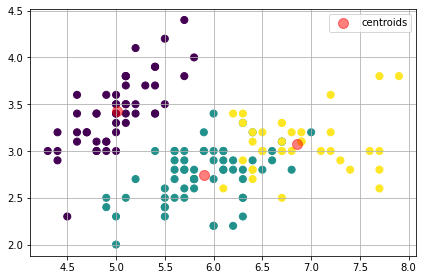

In [ ]:
# Show the original data and the centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmc, s=50, cmap='viridis')
# Show the clusters
centers = kmc.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, label='centroids');

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Now predict which class a new data set would belong to
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
example_1 = [[5.0,	3.2, 1.3,	0.2]]
result = kmc.predict(example_1)
print(result)

example_2 = [[6.3,	3.4,	5.5,	2.4]]
result = kmc.predict(example_2)
print(result)

Your task is to create 10 data sets, and to see which iris class they would belong to and to evaluate those examples on the existing model.

1) Create 10 datasets of this format "[[6.3,	3.4,	5.5,	2.4]]" and use a random number generator to create the values.

2) Apply those inputs to the trained Kmeans model (with the statement kmc.predict())

3) Create a simple algorithm to determine the iris name
(for example if (result == 0, irisname = Iris Setosa)

PART 2

In this part you will train a Naive Bayes classifier on newsgroup data and test the classifier on a different dataset that you find - or create.


In [ ]:
# Imports
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [ ]:
# Check
print(data.target_names)
print(len(data.target_names))

In [ ]:
# pick some categories and divide the collection into training and test data
selected_categories = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=selected_categories)
test = fetch_20newsgroups(subset='test', categories=selected_categories)

In [ ]:
# Use the TF-IDF vectorizer and create a pipeline that attaches it to a Naive Bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
# Fit the model to the data
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
# Define a prediction function to map label to category
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return (train.target_names[pred[0]])

In [ ]:
# Call the prediction function
predicted_category = predict_category('discussing islam vs atheism')
print(predicted_category)

Your task is to collect a set of short texts, and evaluate them with the Naive Bayes model trained on the previously selected categories.

You can use any kind of text that you find relevant to the assignment.

Your text selection should have at least 20 individual examples, all in an array:

evaluation_data = ['this is the fist test', 'and now this is the second test'...]

Then create a loop to have each element of the evaluation data evaluated with the existing model. 

Print out the predicted labels and comment on the results.


In [ ]:
# Your code here